In [19]:
import matplotlib.pyplot as plt
import numpy as np

In [20]:
# 1. Define the data for each group (already sorted by accuracy as requested)
data = {
    "Lexicon-Based (Baseline)": [
        ("Sentiment Lexicon", 0.67)
    ],
    "Machine Learning": [
        ("Decision Tree", 0.72),
        ("KNN", 0.75),
        ("AdaBoost", 0.77),
        ("Logistic Regression", 0.81),
        ("SVM", 0.81),
        ("XGBoost", 0.83),
        ("CatBoost", 0.83)
    ],
    "Deep Learning": [
        ("CNN", 0.79),
        ("BiLSTM", 0.80)
    ],
    "Pre-trained Language Models": [
        ("GPT2-Chinese", 0.83), # Shortened name for better display
        ("BERT-base-chinese", 0.84),
        ("RoBERTa-wwm-ext", 0.84) # Shortened name
    ],
    "Ensemble Generalization": [
        ("Ensemble", 0.86)
    ]
}

# TapTap Theme Colors (approximated from images)
color_bright_teal = '#77D6DD' # Prominent teal from logo/icons
color_light_teal = '#A0E0D4' # Lighter teal from backgrounds/bars
color_dark_text = '#44546C' # Dark grey/blue for text

In [21]:
# 2. Prepare data for plotting
group_names = list(data.keys())
all_model_names = []
all_accuracies = []
group_boundaries = [] # Store indices where groups end

current_index = 0
for group in group_names:
    models = data[group]
    for model_name, accuracy in models:
        all_model_names.append(model_name)
        all_accuracies.append(accuracy)
    current_index += len(models)
    group_boundaries.append(current_index - 0.5) # Position for vertical lines

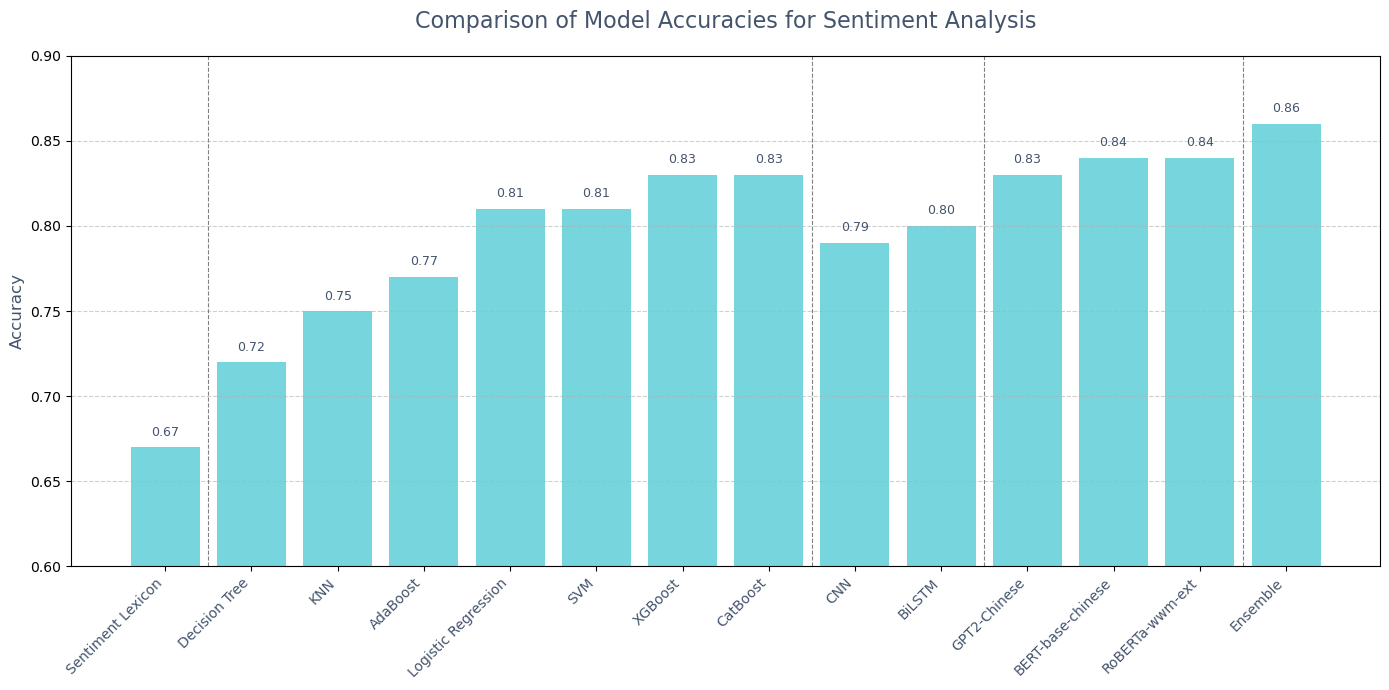

In [22]:
# 3. Create the plot
fig, ax = plt.subplots(figsize=(14, 7)) # Adjust figure size as needed

# Bar chart
bars = ax.bar(all_model_names, all_accuracies, color=color_bright_teal)

# 4. Add labels and title (in English)
ax.set_ylabel("Accuracy", fontsize=12, color=color_dark_text)
ax.set_title("Comparison of Model Accuracies for Sentiment Analysis", fontsize=16, color=color_dark_text, pad=20)
ax.set_ylim(0.6, 0.9) # Set y-axis limits to better show differences

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right', fontsize=10, color=color_dark_text) # ha='right' aligns labels better when rotated

# Add accuracy values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.005, # Position text slightly above bar
             f'{yval:.2f}',       # Format to 2 decimal places
             va='bottom',         # Vertical alignment
             ha='center',         # Horizontal alignment
             fontsize=9,
             color=color_dark_text)

# Add vertical lines to separate groups
for boundary in group_boundaries[:-1]: # Don't add a line after the last group
    ax.axvline(x=boundary, color='grey', linestyle='--', linewidth=0.8)

# Add group labels below the x-axis (optional, can be tricky with rotated labels)
# This part is commented out as it often clashes with rotated tick labels.
# Vertical lines provide clearer separation in this case.
# tick_positions = np.arange(len(all_model_names))
# group_label_positions = []
# start_index = 0
# for i, group in enumerate(group_names):
#     num_models = len(data[group])
#     mid_point = start_index + (num_models / 2.0) - 0.5
#     group_label_positions.append(mid_point)
#     start_index += num_models
#
# for i, label_pos in enumerate(group_label_positions):
#     ax.text(label_pos, ax.get_ylim()[0] - 0.05, # Position below x-axis
#             group_names[i],
#             ha='center', va='top', fontsize=10, color=color_dark_text, wrap=True)


# Improve layout
plt.grid(axis='y', linestyle='--', alpha=0.6) # Add horizontal grid lines
plt.tight_layout() # Adjust plot to prevent labels overlapping

# 5. Show the plot
plt.show()

Figure saved as 'model_accuracy_comparison_high_res.png' with 800 DPI.


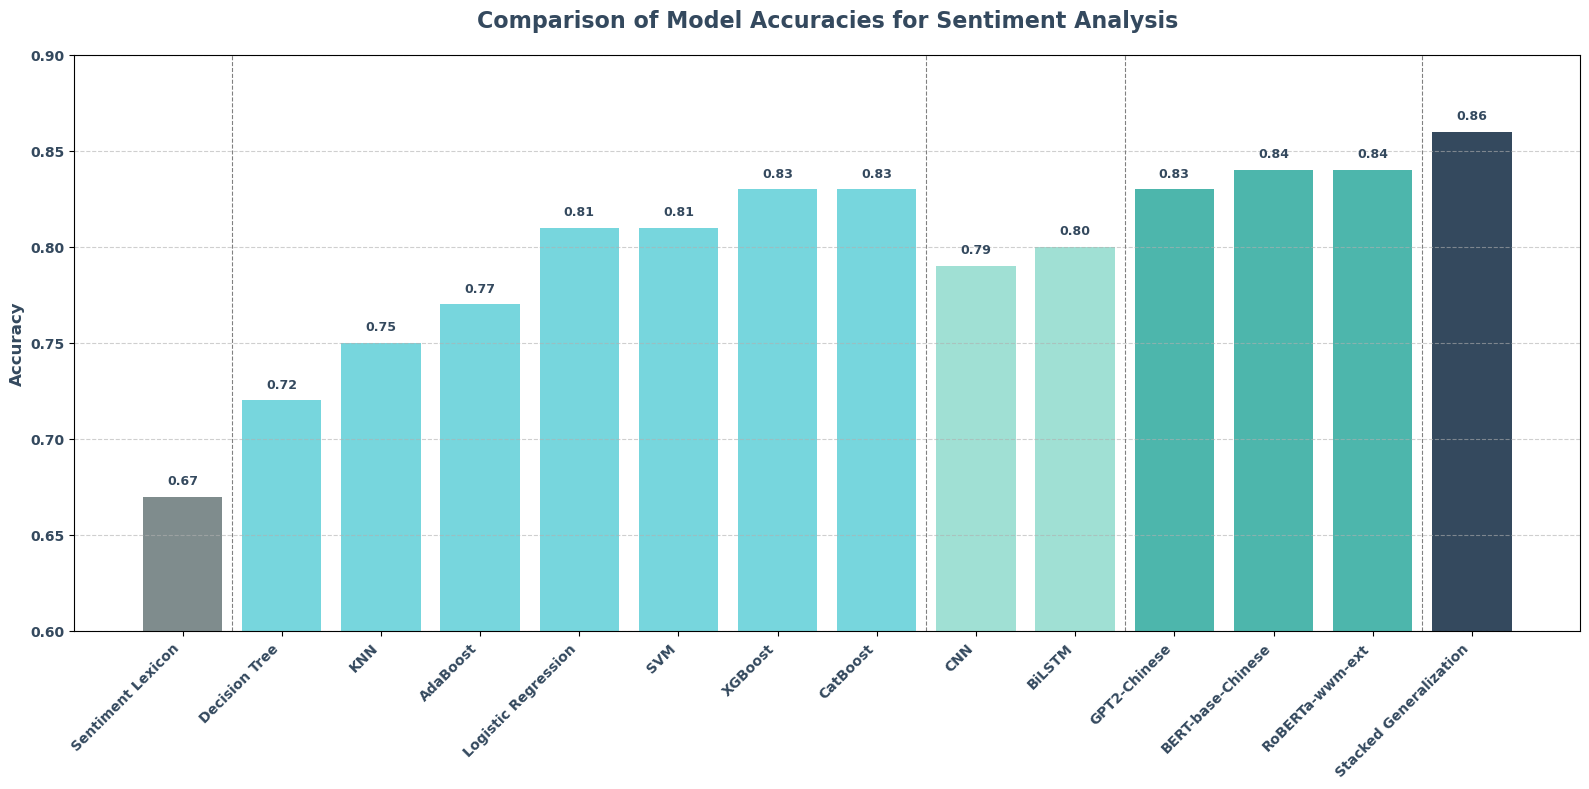

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm # Import font manager

# Optional: If you want to use a specific bold font available on your system
# try:
#     # Find a bold font (e.g., Arial Bold, DejaVu Sans Bold)
#     bold_font_prop = fm.FontProperties(weight='bold')
#     plt.rcParams['font.family'] = bold_font_prop.get_name()
# except:
#     print("Bold font not explicitly found, using Matplotlib default bold.")
#     pass # Continue with default bolding if specific font not found

# 1. Define the data for each group (already sorted by accuracy)
data = {
    "Lexicon-Based (Baseline)": [
        ("Sentiment Lexicon", 0.67)
    ],
    "Machine Learning": [
        ("Decision Tree", 0.72),
        ("KNN", 0.75),
        ("AdaBoost", 0.77),
        ("Logistic Regression", 0.81),
        ("SVM", 0.81),
        ("XGBoost", 0.83),
        ("CatBoost", 0.83)
    ],
    "Deep Learning": [
        ("CNN", 0.79),
        ("BiLSTM", 0.80)
    ],
    "Pre-trained Language Models": [
        ("GPT2-Chinese", 0.83), # Shortened name
        ("BERT-base-Chinese", 0.84),
        ("RoBERTa-wwm-ext", 0.84) # Shortened name
    ],
    "Ensemble Generalization": [
        ("Stacked Generalization", 0.86)
    ]
}

# 2. Define Colors and Prepare Data
# TapTap Theme Colors (approximated) + additions for groups
color_bright_teal = '#77D6DD'
color_light_teal = '#A0E0D4'
color_dark_text = '#34495E'
color_medium_teal = '#4DB6AC' # Added variation
color_grey = '#7F8C8D'       # Added grey

# Assign colors to groups
group_colors = [
    color_grey,         # Lexicon-Based
    color_bright_teal,  # Machine Learning
    color_light_teal,   # Deep Learning
    color_medium_teal,  # Pre-trained
    color_dark_text     # Ensemble
]

group_names = list(data.keys())
all_model_names = []
all_accuracies = []
bar_colors = [] # List to store color for each bar
group_boundaries = []

current_index = 0
for i, group in enumerate(group_names):
    models = data[group]
    group_color = group_colors[i % len(group_colors)] # Cycle through colors if more groups than colors
    for model_name, accuracy in models:
        all_model_names.append(model_name)
        all_accuracies.append(accuracy)
        bar_colors.append(group_color) # Assign the group's color to this bar
    current_index += len(models)
    group_boundaries.append(current_index - 0.5)

# 3. Create the plot
fig, ax = plt.subplots(figsize=(16, 8)) # Adjusted size slightly

# Bar chart with specific colors for each bar
bars = ax.bar(all_model_names, all_accuracies, color=bar_colors)

# 4. Add labels and title (bold)
ax.set_ylabel("Accuracy", fontsize=12, color=color_dark_text, fontweight='bold')
ax.set_title("Comparison of Model Accuracies for Sentiment Analysis", fontsize=16, color=color_dark_text, fontweight='bold', pad=20)
ax.set_ylim(0.6, 0.9)

# Rotate x-axis labels, make bold
plt.xticks(rotation=45, ha='right', fontsize=10, color=color_dark_text, fontweight='bold')

# Set y-axis tick parameters (size and color are valid here)
ax.tick_params(axis='y', labelsize=10, labelcolor=color_dark_text)

# Make y-axis tick labels bold
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

# Add accuracy values on top of bars (bold)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.005,
             f'{yval:.2f}',
             va='bottom',
             ha='center',
             fontsize=9,
             color=color_dark_text,
             fontweight='bold')

# Add vertical lines to separate groups
for boundary in group_boundaries[:-1]:
    ax.axvline(x=boundary, color='grey', linestyle='--', linewidth=0.8)

# Improve layout
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout() # Adjust layout first

# --- Add this section to save the figure ---
# Choose your filename and desired DPI
filename = "model_accuracy_comparison_high_res.png"
resolution_dpi = 800 # Example: 300 DPI for print quality

plt.savefig(filename, dpi=resolution_dpi, bbox_inches='tight')
# bbox_inches='tight' helps remove extra white space around the plot
print(f"Figure saved as '{filename}' with {resolution_dpi} DPI.")
# You could also save as PDF (vector format, resolution independent for text/lines):
# plt.savefig("model_accuracy_comparison.pdf", bbox_inches='tight')
# --- End save section ---


# 5. Show the plot (optional after saving)
plt.show()